In [10]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os

# Import data
raw_eqk = pd.read_csv('../data/earthquake_data.csv')

#### Data Selection

In [5]:
#Check which are the unique values for the type of earthquakes

raw_eqk.type.unique()

array(['earthquake', 'quarry blast', 'quarry', 'mining explosion',
       'rock burst', 'explosion', 'landslide', 'sonicboom', 'sonic boom',
       'anthropogenic event', 'acoustic noise'], dtype=object)

In [31]:
worldmap.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [40]:
# Convert dataframe to a geopandas dataframe
points = gpd.points_from_xy(raw_eqk.longitude,
                           raw_eqk.latitude)

eqk_gdf = gpd.GeoDataFrame(raw_eqk,
                          geometry=points,
                          crs='EPSG:4326')

In [42]:
#Select only data with with type equal to ‘eartquake’ and magnitude greater than or equal to 6.5.
eqk_sub = raw_eqk[(raw_eqk['mag'] >= 6.5) & (raw_eqk['type'] == 'earthquake')]
# eqk = eqk[eqk_sub]
eqk_sub.mag.unique()

array([6.5, 6.9, 6.7, 6.8, 7.5, 6.6, 7.2, 7.4, 7.6, 7.1, 7.7, 8.2, 7.9,
       7.3, 7. ])

In [33]:
worldmap.crs == eqk_gdf.crs

True

### Data for world map

In [34]:
fp = os.path.join('../','data', 'ne_110m_admin_0_countries', 'ne_110m_admin_0_countries.shp')
worldmap = gpd.read_file(fp)

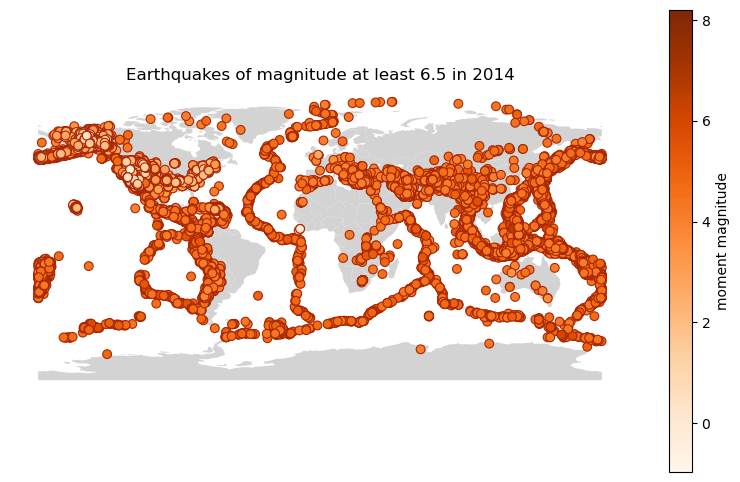

In [44]:
fig, ax = plt.subplots(figsize = (10,6))

ax.axis('off')

ax.set_title('Earthquakes of magnitude at least 6.5 in 2014',
            fontsize = 12)

# Add countries
worldmap.plot(ax = ax,
             color = '#D3D3D3',
             edgecolor = 'none')

# Add earthquakes
eqk_gdf.plot(ax = ax,
            column = 'mag',
            legend = True,
            edgecolors = '#AA2704',
            markersize = 40,
            cmap = 'Oranges',
            linewidth = 0.8,
            legend_kwds = {'label': 'moment magnitude'})

plt.show()

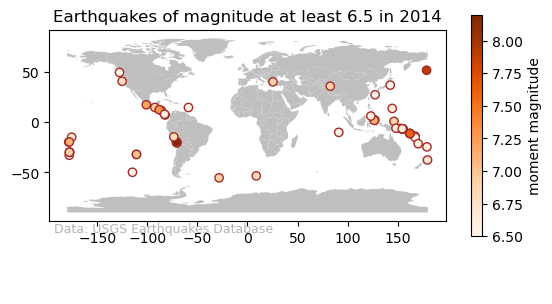

In [13]:
fix,ax = plt.subplots()

worldmap.plot(ax = ax, color = '.75')


eqk.plot(ax=ax,
        column='mag',
        cmap='Oranges',
        edgecolor='brown',
        legend=True,
        legend_kwds={'shrink':.6,
                    'label':'moment magnitude'})

ax.set_title('Earthquakes of magnitude at least 6.5 in 2014')

ax.annotate('Data: USGS Earthquakes Database',
             xy=(0.085,0.15),
             xycoords='figure fraction',
             fontsize=9,
             color='0.7')

plt.show()